Initial cost:
0.2882047621376168
Actual values:


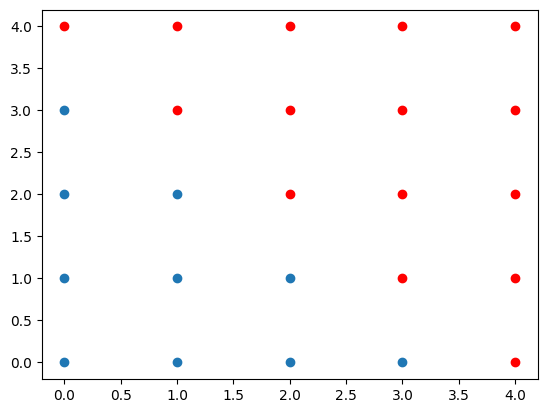

Predicted values:


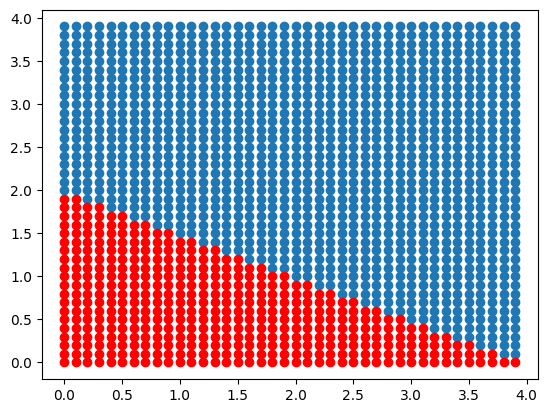

In [1]:
import numpy as np
from matplotlib import pyplot as plt


def sig(x):
    return 1 / (1 + np.exp(-x))

def shp(n: np.ndarray):
    return n.reshape((-1, n.shape[-1]))


def val(x: np.ndarray, w, b):
    """
    input:
        `N`[1...inf) input rows(M,)
    return:
        `2D(N,M)` arr of predictions
    """
    return shp(np.dot(w, x.T)).T + b  # w is applied to N[1...inf) rows of x. Result: 2D(N, M) arr of predictions


def pred(x, w, b):
    return sig(val(x, w, b))


dataset = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 2, 0],
    [0, 3, 0],
    [0, 4, 1],
    [1, 0, 0],
    [1, 1, 0],
    [1, 2, 0],
    [1, 3, 1],
    [1, 4, 1],
    [2, 0, 0],
    [2, 1, 0],
    [2, 2, 1],
    [2, 3, 1],
    [2, 4, 1],
    [3, 0, 0],
    [3, 1, 1],
    [3, 2, 1],
    [3, 3, 1],
    [3, 4, 1],
    [4, 0, 1],
    [4, 1, 1],
    [4, 2, 1],
    [4, 3, 1],
    [4, 4, 1],
])
x_train = dataset[:, :-1]
y_train = dataset[:, -1:]
w = [1, 2]
b = -4

def setplot():
    smols = np.array([x for x in dataset if x[2] == 0])
    highs = np.array([x for x in dataset if x[2] == 1])
    plt.scatter(smols[:, 0], smols[:, 1])
    plt.scatter(highs[:, 0], highs[:, 1], c='red')
    plt.show()

def checkplot():
    check_set = []
    for i in np.arange(0, 4, 0.1):
        for j in np.arange(0, 4, 0.1):
            check_set.append([np.round(i, 1), np.round(j, 1)])
    check_set = np.array(check_set)
    preds = pred(check_set, w, b)
    check_set = np.hstack((check_set, preds))
    smols = np.array([x for x in check_set if x[2] >= 0.5])
    highs = np.array([x for x in check_set if x[2] < 0.5])
    if len(smols) > 0:
        plt.scatter(smols[:, 0], smols[:, 1])
    if len(highs) > 0:
        plt.scatter(highs[:, 0], highs[:, 1], c='red')
    plt.show()

def cost(f, y):
    a = y * np.log(f)
    b = (1 - y) * np.log(1 - f)
    return -np.mean(a+b)

def gradient(x,w,b,y):
    v = val(x,w,b)
    f = pred(x,w,b)
    err = f - y
    gw = np.dot(err.T, x) / len(err)
    gb = np.mean(err)
    return gw,gb

print("Initial cost:")
print(cost(pred(x_train, w, b), y_train))
print("Actual values:")
setplot()
print("Predicted values:")
checkplot()

COST=0.04306624022480929: 100%|██████████| 1000/1000 [00:00<00:00, 1602.22it/s]


Predicted values:


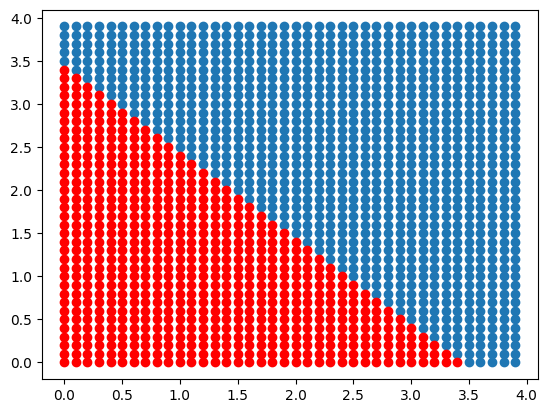

In [2]:
from tqdm import tqdm

with tqdm(range(1000)) as pbar:
    for i in pbar:
        gw, gb = gradient(x_train, w, b, y_train)
        w -= gw
        b -= gb
        pbar.set_description(f"COST={cost(pred(x_train, w, b), y_train)}")
print("Predicted values:")
checkplot()
